# Introduction: Machine Learning Project - Energy Star Score 

# Imports

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

#set default fontsize 
plt.rcParams['font.size'] = 24

#internal ipython tool for setting figsize
from IPython.core.pylabtools import figsize


import seaborn as sns

sns.set(font_scale=2)

#no warning about setting a value on copy of  slice
pd.options.mode.chained_assignment=None

#display upto no of columns is 60.
pd.set_option('display.max_columns',60)



#  Data Cleaning & Formating

#  Load the data & Examine

In [2]:
data = pd.read_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")

data.head()

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2 Postal Code  \
0  201/205  East  42nd  st.            Not Available       10017   
1          622 168th Street            Not Available       10032   
2             3975 Broadway            Not Available       10032   
3   161 Fort Washington Ave  177 Fort Washington Ave       10032   
4     710 West 168th Street            Not Available       10032   

  Street Number           Street Name    Borough  DOF Gross Floor Area  \
0           675              3 AVENUE  Manhattan              289356.0   
1           180  FT WASHINGTON AVENUE  Manhattan             3693539.0   
2          3975              BROADWAY  Manhattan              152765.0   
3           161  FT WASHINGTON AVENUE  Manhattan              891040.0   
4           193  FT WASHINGTON AVENUE  Manhattan              211400.0   

   Primary Property Type - Self Selected  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  List of All Property Use Types at Property  \
0                                     Office   
1      Hospital (General Medical & Surgical)   
2      Hospital (General Medical & Surgical)   
3      Hospital (General Medical & Surgical)   
4      Hospital (General Medical & Surgical)   

               Largest Property Use Type  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  Largest Property Use Type - Gross Floor Area (ft²)  \
0                                             293447   
1                                            3889181   
2                                             231342   
3                                            1305748   
4                                             179694   

  2nd Largest Property Use Type  \
0                 Not Available   
1                 Not Available   
2                 Not Available   
3                 Not Available   
4                 Not Available   

  2nd Largest Property Use - Gross Floor Area (ft²)  \
0                                     Not Available   
1                                     Not Available   
2                                     Not Available   
3                                     Not Available   
4                    

# Data Types & Missing values 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

# Convert data into correct types

In [4]:
#replace all occurences of not available with numpy Nan
data=data.replace({'Not Available':np.nan})

#iterate through the columns
for col in list(data.columns):
    #select the coumns should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        #convert the data type to float
        data[col]=data[col].astype(float)

In [5]:
data.describe()

Order   Property Id  DOF Gross Floor Area  \
count  11746.000000  1.174600e+04          1.162800e+04   
mean    7185.759578  3.642958e+06          1.732695e+05   
std     4323.859984  1.049070e+06          3.367055e+05   
min        1.000000  7.365000e+03          5.002800e+04   
25%     3428.250000  2.747222e+06          6.524000e+04   
50%     6986.500000  3.236404e+06          9.313850e+04   
75%    11054.500000  4.409092e+06          1.596140e+05   
max    14993.000000  5.991312e+06          1.354011e+07   

       Largest Property Use Type - Gross Floor Area (ft²)  \
count                                       1.174400e+04    
mean                                        1.605524e+05    
std                                         3.095746e+05    
min                                         5.400000e+01    
25%                                         6.520100e+04    
50%                                         9.132400e+04    
75%                                         1.532550e+05    
max                                         1.421712e+07    

       2nd Largest Property Use - Gross Floor Area (ft²)  \
count                                        3741.000000   
mean                                        22778.682010   
std                                         55094.441422   
min                                             0.000000   
25%                                          4000.000000   
50%                                          8654.000000   
75%                                         20000.000000   
max                                        962428.000000   

       3rd Largest Property Use Type - Gross Floor Area (ft²)    Year Built  \
count                                        1484.000000       11746.000000   
mean                                        12016.825270        1948.738379   
std                                         27959.755486          30.576386   
min                                             0.000000        1600.000000   
25%                                          1720.750000        1927.000000   
50%                                          5000.000000        1941.000000   
75%                                         12000.000000        1966.000000   
max                                        591640.000000        2019.000000   

       Number of Buildings - Self-reported     Occupancy  ENERGY STAR Score  \
count                         11746.000000  11746.000000        9642.000000   
mean                              1.289971     98.762557          59.854594   
std                               4.017484      7.501603          29.993586   
min                               0.000000      0.000000           1.000000   
25%                               1.000000    100.000000          37.000000   
50%                               1.000000    100.000000          65.000000   
75%                               1.000000    100.000000          85.000000   
max                             161.000000    100.000000         100.000000   

       Site EUI (kBtu/ft²)  Weather Normalized Site EUI (kBtu/ft²)  \
count         11583.000000                            10281.000000   
mean            280.071484                              309.747466   
std            8607.178877                             9784.731207   
min               0.000000                                0.000000   
25%              61.800000                               65.100000   
50%              78.500000                               82.500000   
75%              97.600000                              102.500000   
max          869265.000000                           939329.000000   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
count                                       10959.000000         
mean                                           11.072643         
std                                           127.733868         
min                                             0.000000         
25%   

In [6]:
# function to calculate missing values by column
def missing_values_table(df):
    #total mising values
    mis_val=df.isnull().sum()
    #% of missing values
    mis_val_percent=100*df.isnull().sum()/len(df)
    #make a table with results
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    #rename columns
    mis_val_table_ren_columns=mis_val_table.rename(columns={0:'missing values',1:'% of total values'})
    #sort the table by % of missing descending
    mis_val_table_ren_columns=mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of total values',ascending=False).round(1)
    #print some summery
    print('your data has ' + str(df.shape[1]) + " columns."
         'there are ' + str(mis_val_table_ren_columns.shape[0]) + ' columns has missing values')
    return mis_val_table_ren_columns 

    

In [7]:
missing_values_table(data)

your data has 60 columns.there are 46 columns has missing values


missing values  \
Fuel Oil #1 Use (kBtu)                                       11737   
Diesel #2 Use (kBtu)                                         11730   
Address 2                                                    11539   
Fuel Oil #5 & 6 Use (kBtu)                                   11152   
District Steam Use (kBtu)                                    10810   
Fuel Oil #4 Use (kBtu)                                       10425   
3rd Largest Property Use Type - Gross Floor Are...           10262   
3rd Largest Property Use Type                                10262   
Fuel Oil #2 Use (kBtu)                                        9165   
2nd Largest Property Use Type                                 8005   
2nd Largest Property Use - Gross Floor Area (ft²)             8005   
Metered Areas  (Water)                                        4609   
Water Intensity (All Water Sources) (gal/ft²)                 3984   
Water Use (All Water Sources) (kgal)                          3984   
Latitude                                                      2263   
Longitude                                                     2263   
Community Board                                               2263   
Council District                                              2263   
Census Tract                                                  2263   
NTA                                                           2263   
ENERGY STAR Score                                             2104   
Weather Normalized Site Natural Gas Intensity (...            1963   
Weather Normalized Site Natural Gas Use (therms)              1962   
Weather Normalized Source EUI (kBtu/ft²)                      1465   
Weather Normalized Site EUI (kBtu/ft²)                        1465   
Natural Gas Use (kBtu)                                        1442   
Weather Normalized Site Electricity Intensity (...             787   
Weather Normalized Site Electricity (kWh)                      786   
Electricity Use - Grid Purchase (kBtu)                         244   
Site EUI (kBtu/ft²)                                            163   
Source EUI (kBtu/ft²)                                          163   
NYC Building Identification Number (BIN)                       162   
Street Number                                                  124   
Street Name                                                    122   
Borough                                                        118   
DOF Gross Floor Area                                           118   
Water Required?                                                118   
Direct GHG Emissions (Metric Tons CO2e)                         83   
Total GHG Emissions (Metric Tons CO2e)                          74   
Indirect GHG Emissions (Metric Tons CO2e)                       65   
Metered Areas (Energy)                                          57   
DOF Benchmarking Submission Status                              30   
NYC Borough, Block and Lot (BBL) self-reported                  11   
BBL - 10 digits                                                 11   
Largest Property Use Type                                        2   
Largest Property Use Type - Gross Floor Area (ft²)               2   

                                                    % of total values  
Fuel Oil #1 Use (kBtu)                                           99.9  
Diesel #2 Use (kBtu)                                             99.9  
Address 2                                                        98.2  
Fuel Oil #5 & 6 Use (kBtu)                                       94.9  
District Steam Use (kBtu)                                        92.0  
Fuel Oil #4 Use (kBtu)                                           88.8  
3rd Largest Property Use Type - Gross Floor Are...               87.4  
3rd Largest Property Use Type                                    87.4  
Fuel Oil #2 Use (kBtu)                                           78.0  
2nd Largest Property Use Type            

In [8]:
#get missing values > 50% missing
missing_df = missing_values_table(data);
missing_columns=list(missing_df[missing_df['% of total values'] > 50].index)

print('we will remove %d columns.' %len(missing_columns))

your data has 60 columns.there are 46 columns has missing values
we will remove 11 columns.


In [9]:
#drop columns
data=data.drop(columns=list(missing_columns))

# Exploratory Data Analysis

# Single Plot Variables

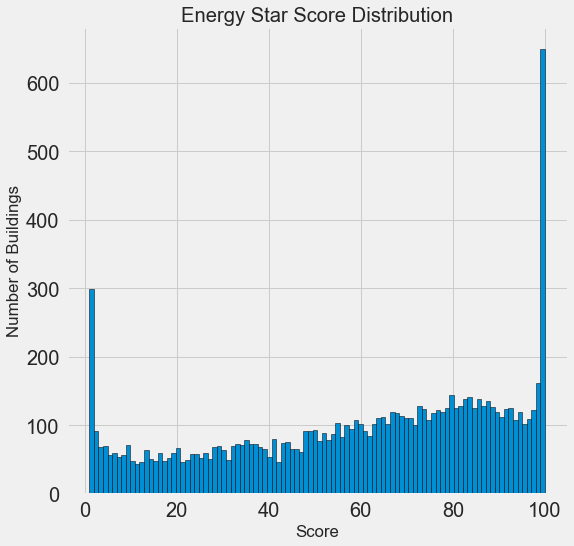

In [10]:
figsize(8, 8)

# Rename the score 
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

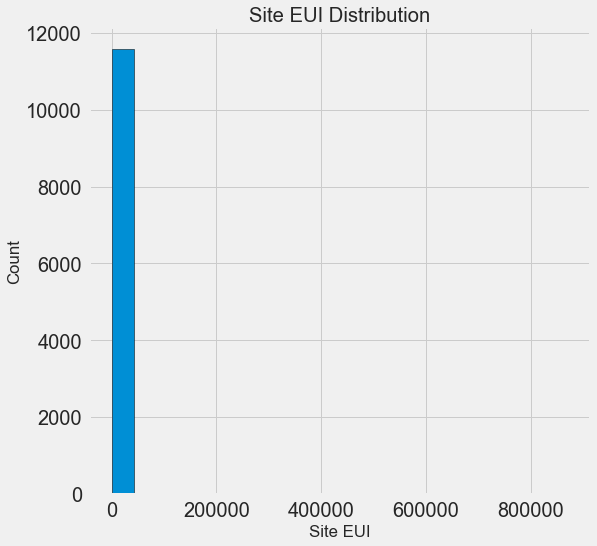

In [11]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [12]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [13]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [14]:
# here last one is much more than others.so its an outlier.

In [15]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]


Order  Property Id Property Name                   Parent Property Id  \
8068   9984      4414323  234 Skillman  Not Applicable: Standalone Property   

                     Parent Property Name BBL - 10 digits  \
8068  Not Applicable: Standalone Property      3028937502   

     NYC Borough, Block and Lot (BBL) self-reported  \
8068                                     3028937502   

     NYC Building Identification Number (BIN) Address 1 (self-reported)  \
8068                        3390250 , 3338313       234 Skillman avenue   

     Postal Code Street Number      Street Name   Borough  \
8068       11211           234  SKILLMAN AVENUE  Brooklyn   

      DOF Gross Floor Area Primary Property Type - Self Selected  \
8068               61811.0                   Multifamily Housing   

     List of All Property Use Types at Property Largest Property Use Type  \
8068                        Multifamily Housing       Multifamily Housing   

      Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
8068                                            56900.0         2004   

      Number of Buildings - Self-reported  Occupancy Metered Areas (Energy)  \
8068                                    1         90         Whole Building   

     Metered Areas  (Water)  score  Site EUI (kBtu/ft²)  \
8068                    NaN    1.0             869265.0   

      Weather Normalized Site EUI (kBtu/ft²)  \
8068                                939329.0   

      Weather Normalized Site Electricity Intensity (kWh/ft²)  \
8068                                                9.9         

      Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
8068                                             9393.0            

      Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
8068                                  986366.0            4.945919e+10   

      Weather Normalized Site Natural Gas Use (therms)  \
8068                                       534458968.8   

      Electricity Use - Grid Purchase (kBtu)  \
8068                               1983655.6   

      Weather Normalized Site Electricity (kWh)  \
8068                                   563239.6   

      Total GHG Emissions (Metric Tons CO2e)  \
8068                               2627199.1   

      Direct GHG Emissions (Metric Tons CO2e)  \
8068                                2627015.0   

      Indirect GHG Emissions (Metric Tons CO2e)  \
8068                                      184.1   

      Property GFA - Self-Reported (ft²)  \
8068                             56900.0   

      Water Use (All Water Sources) (kgal)  \
8068                                2547.9   

      Water Intensity (All Water Sources) (gal/ft²)  Source EUI (kBtu/ft²)  \
8068                                          44.78               912801.1   

                Release Date Water Required?  \
8068  05/01/2017 11:34:14 PM             NaN   

     DOF Benchmarking Submission Status   Latitude  Longitude  \
8068                      In Compliance  40.716233  -73.94141   

      Community Board  Council District  Census Tract  \
8068              1.0              34.0         477.0   

                                                    NTA  
8068  East Williamsburg                             ...

## Remove outliers

When we remove outliers, we want to be careful that we are not throwing away measurements just because they look strange. They may be the result of actual phenomenon that we should further investigate.

On the low end, an extreme outlier is below  $\text{First Quartile} -3 * \text{Interquartile Range}$


On the high end, an extreme outlier is above $\text{Third Quartile} + 3 * \text{Interquartile Range}$

In this case, I will only remove the single outlying point and see how the distribution looks.

In [16]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

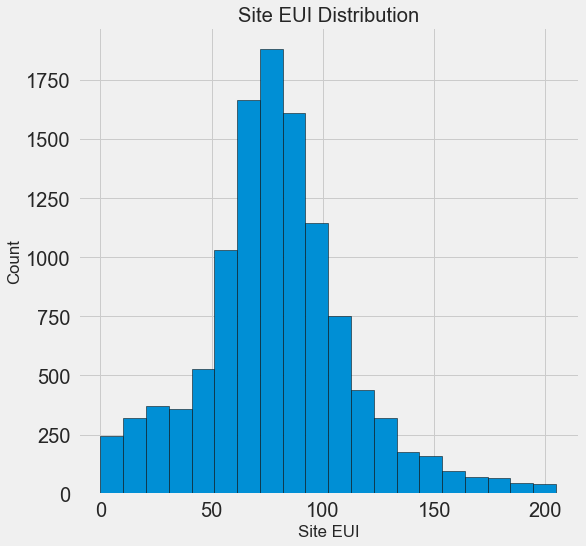

In [17]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

After removing the outliers, we can get back to the analysis.

This plot looks a little less suspicious and is close to normally distributed with a long tail on the right side (it has a positive skew).




# Looking for relationships

In [18]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

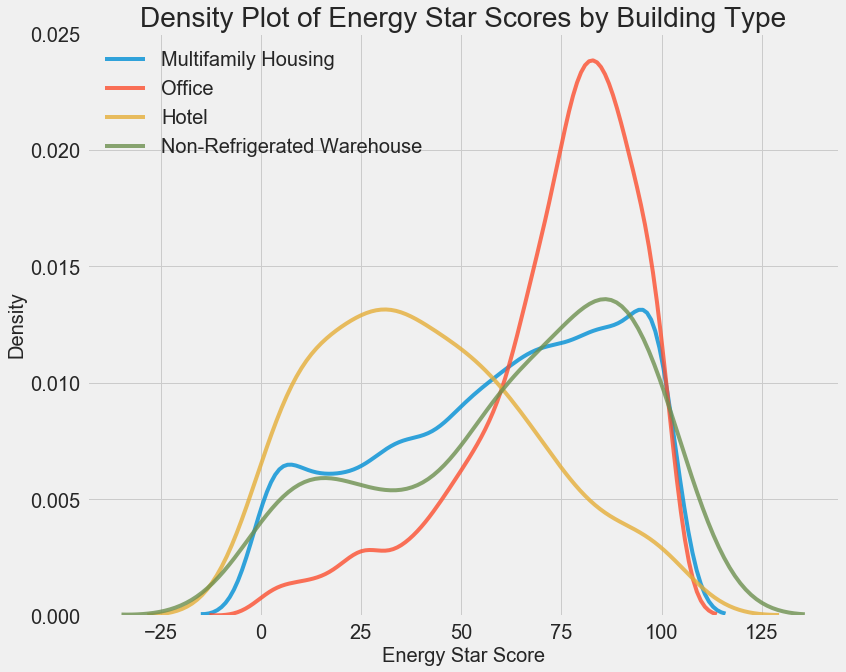

In [19]:
# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

From this graph, we can see that the building type does have an effect on the score (the negative scores on the graph are an artifact of the kernel density estimation procedure). While I was initially going to focus on the numerical columns for predicting the score, this graph tells us that we should include the property type because this information can be useful for determining the score. As building type is a categorical variable, it will have to be one-hot encoded before we can feed it into a machine learning model.

To examine another categorical variable, borough, we can make the same graph, but this time colored by the borough.

In [20]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

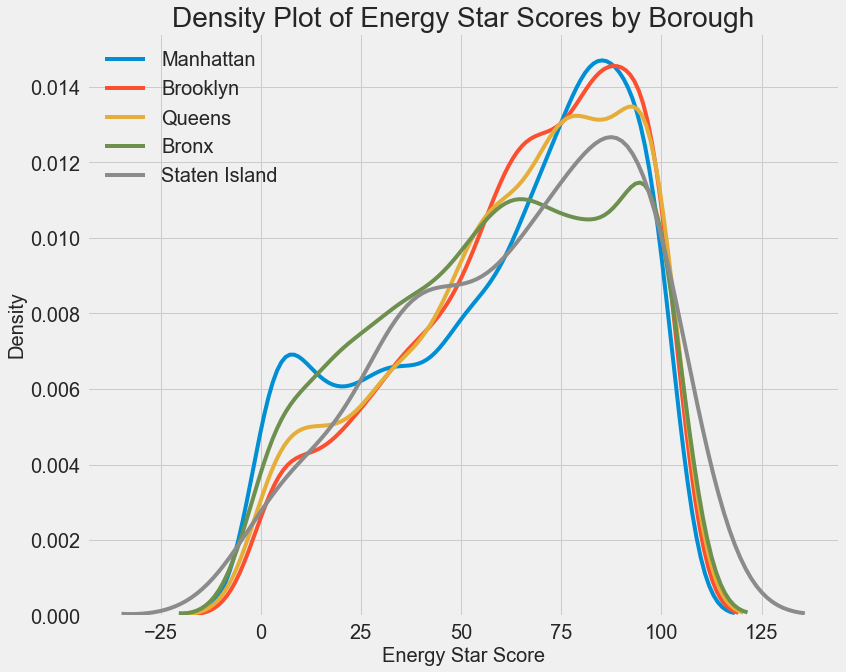

In [21]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

The borough of the building does not seem to make as significant a difference in the distribution of the score as does the building type. Nonetheless, it might make sense to include the borough as a categorical variable.

# Corelation between feature & target

In order to quantify correlations between the features (variables) and the target, we can calculate the Pearson correlation coefficient. This is a measure of the strength and direction of a linear relationship between two variables: a value of -1 means the two variables are perfectly negatively linearly correlated and a value of +1 means the two variables are perfectly positively linearly correlated.

The code below calculates the correlation coefficients between all the variables and the score

In [22]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

There are several strong negative correlations between the features and the target. The most negative correlations with the score are the different categories of Energy Use Intensity (EUI), Site EUI (kBtu/ft²) and  Weather Normalized Site EUI (kBtu/ft²) (these vary slightly in how they are calculated). The EUI is the amount of energy used by a building divided by the square footage of the buildings and is meant to be a measure of the efficiency of a building with a lower score being better. Intuitively, these correlations then make sense: as the EUI increases, the Energy Star Score tends to decrease.


In the following code, we take log and square root transformations of the numerical variables, one-hot encode the two selected categorical variables (building type and borough), calculate the correlations between all of the features and the score, and display the top 15 most positive and top 15 most negative correlations. This is a lot, but with pandas, it is straightforward to do each step!

In [23]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

C:\Users\Mani\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Mani\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Mani\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [24]:
# Display most negative correlations
correlations.head(15)


Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.620329
log_Site EUI (kBtu/ft²)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

In [25]:
# Display most positive correlations
correlations.tail(15)

sqrt_Order                                                         0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_Community Board                                               0.058029
sqrt_Council District                                              0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Prop

After transforming the features, the strongest relationships are still those related to Energy Use Intensity (EUI). The log and square root transformations do not seem the have resulted in any stronger relationships. There are no strong positive linear relationships although we do see that a building type of office (Largest Property Use Type_Office) is slightly positively correlated with the score. This variable is a one-hot encoded representation of the categorical variables for building type.

We can use these correlations in order to perform feature selection (coming up in a little bit). Right now, let's graph the most significant correlation (in terms of absolute value) in the dataset which is Site EUI (kBtu/ft^2). We can color the graph by the building type to show how that affects the relationship.

# two variable plots

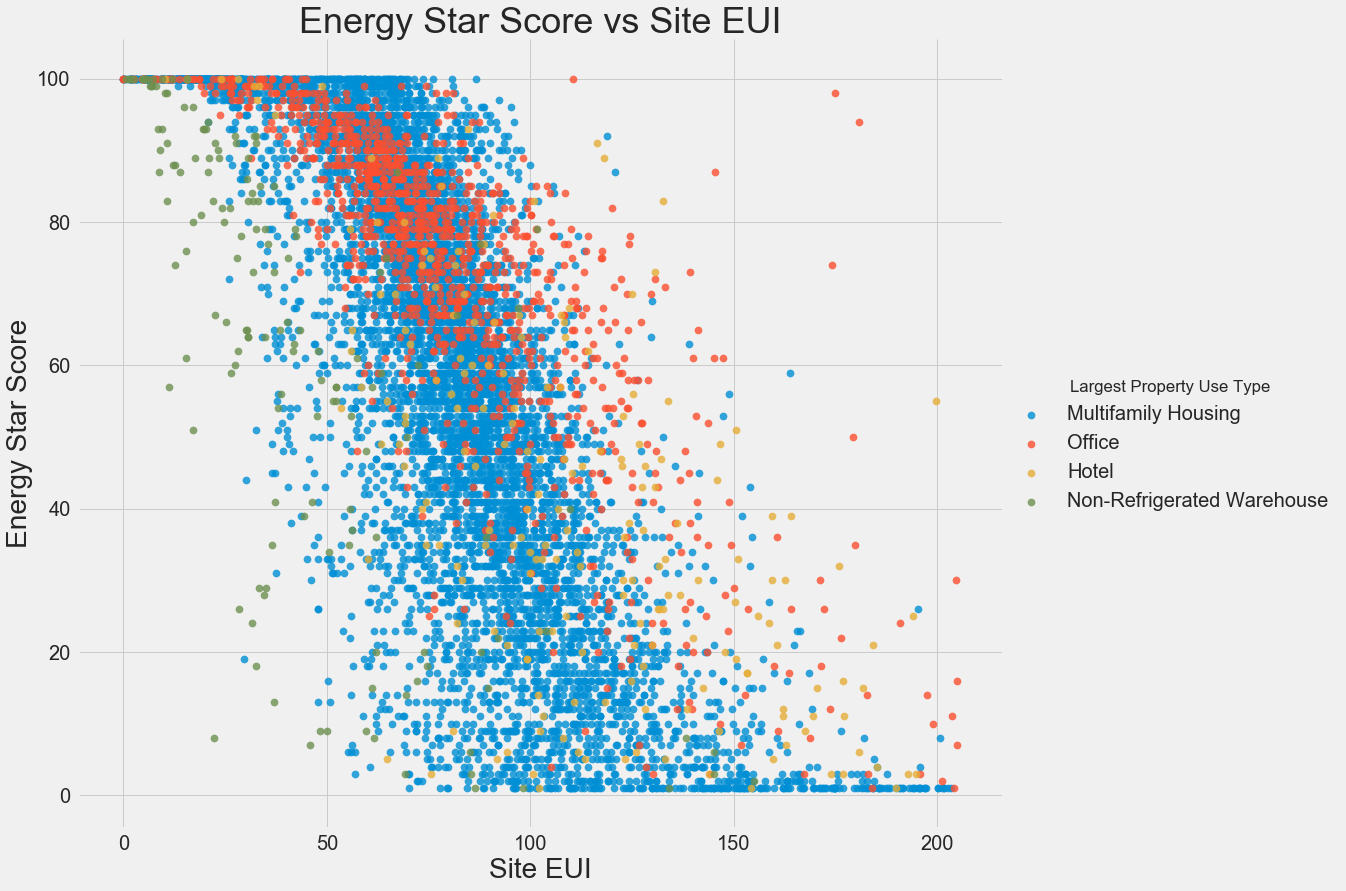

In [26]:
figsize(12, 10)

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

There is a clear negative relationship between the Site EUI and the score. The relationship is not perfectly linear (it looks with a correlation coefficient of -0.7, but it does look like this feature will be important for predicting the score of a building.

# Pairs plot

As a final exercise for exploratory data analysis, we can make a pairs plot between several different variables. The Pairs Plot is a great way to examine many variables at once as it shows scatterplots between pairs of variables and histograms of single variables on the diagonal.

Using the seaborn PairGrid function, we can map different plots on to the three aspects of the grid. The upper triangle will have scatterplots, the diagonal will show histograms, and the lower triangle will show both the correlation coefficient between two variables and a 2-D kernel density estimate of the two variables.

C:\Users\Mani\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\Mani\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\Mani\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\Mani\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\Mani\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\Mani\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


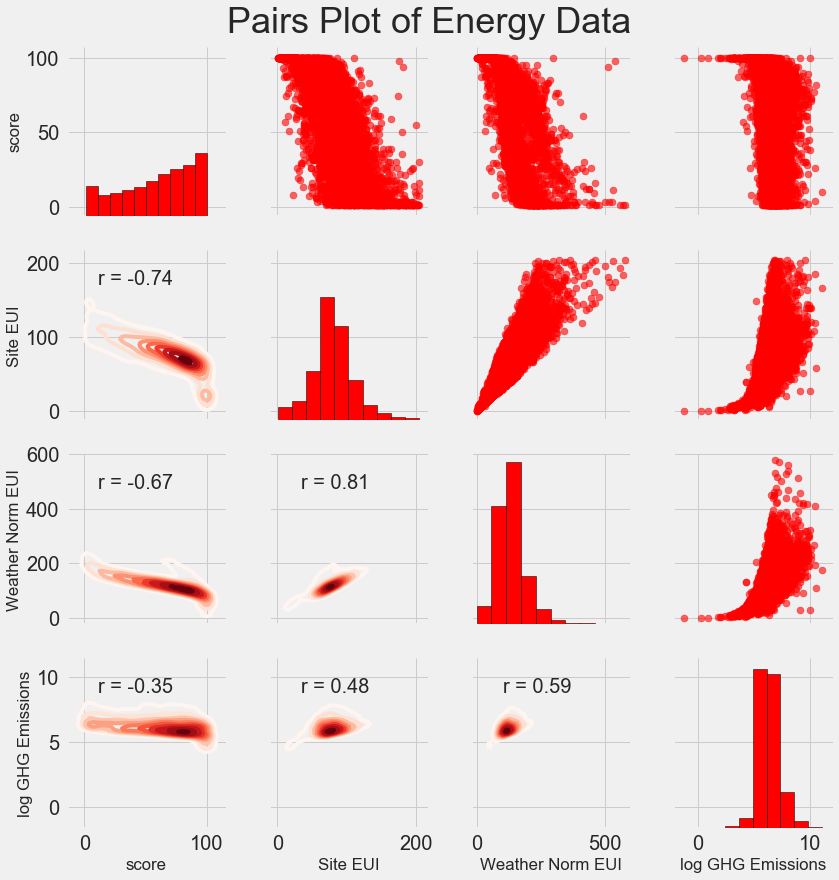

In [27]:
# Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

To interpret the relationships in the plot, we can look for where the variables in one row intersect with the variables in one column. For example, to find the relationship between score and the log of GHG Emissions, we look at the score column and find the log GHG Emissions row. At the intersection (the lower left plot) we see that the score has a -0.35 correlation coefficient with this varible. If we look at the upper right plot, we can see a scatterplot of this relationship.

# Feature Engineering & Selection

Now that we have explored the trends and relationships within the data, we can work on engineering a set of features for our models. We can use the results of the EDA to inform this feature engineering. In particular, we learned the following from EDA which can help us in engineering/selecting features:

The score distribution varies by building type and to a lesser extent by borough. Although we will focus on numerical features, we should also include these two categorical features in the model.
Taking the log transformation of features does not result in significant increases in the linear correlations between features and the score
Before we get any further, we should define what feature engineering and selection are! These definitions are informal and have considerable overlap, but I like to think of them as two separate processes:

Feature Engineering: The process of taking raw data and extracting or creating new features that allow a machine learning model to learn a mapping beween these features and the target. This might mean taking transformations of variables, such as we did with the log and square root, or one-hot encoding categorical variables so they can be used in a model. Generally, I think of feature engineering as adding additional features derived from the raw data.

Feature Selection: The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, I think of feature selection as subtracting features so we are left with only those that are most important.

Feature engineering and selection are iterative processes that will usually require several attempts to get right. Often we will use the results of modeling, such as the feature importances from a random forest, to go back and redo feature selection, or we might later discover relationships that necessitate creating new variables. Moreover, these processes usually incorporate a mixture of domain knowledge and statistical qualitites of the data.

Feature engineering and selection often has the highest returns on time invested in a machine learning problem. It can take quite a while to get right, but is often more important than the exact algorithm and hyperparameters used for the model. If we don't feed the model the correct data, then we are setting it up to fail and we should not expect it to learn!

In this project, we will take the following steps for feature engineering:

Select only the numerical variables and two categorical variables (borough and property use type)

Add in the log transformation of the numerical variables

One-hot encode the categorical variables

In [28]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

C:\Users\Mani\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\Mani\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


(11319, 110)

At this point, we have 11319 observations (buildings) with 109 different features (one column is the score). Not all of these features are likely to be important for predicting the score, and several of these features are also redundant because they are highly correlated. We will deal with this second issue below.

# Remove Collinear Feature

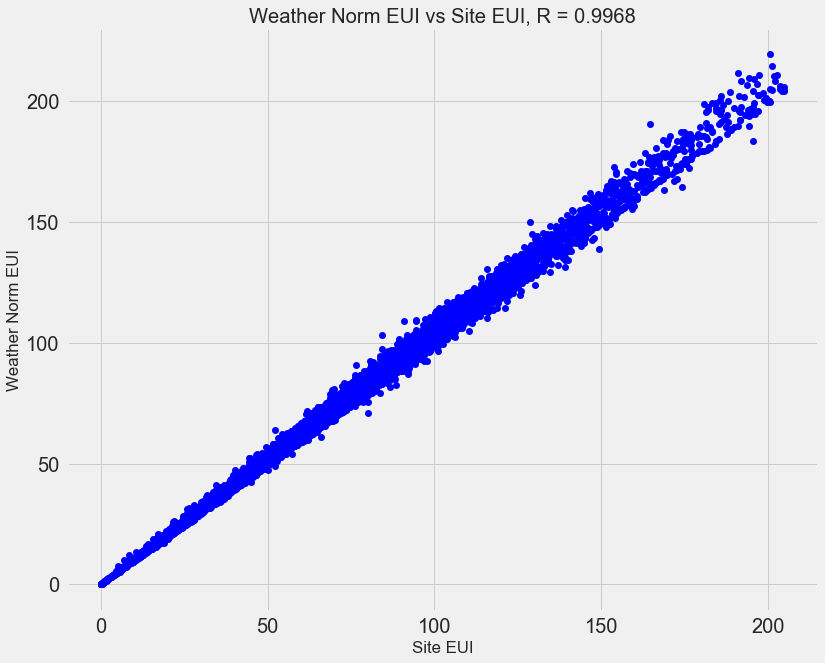

In [29]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

Removing collinear features is a method to reduce model complexity by decreasing the number of features and can help to increase model generalization. It can also help us to interpret the model because we only have to worry about a single variable, such as EUI, rather than how both EUI and weather normalized EUI affect the score.

There are a number of methods for removing collinear features, such as using the Variance Inflation Factor. We will use a simpler metric, and remove features that have a correlation coefficient above a certain threshold with each other (not with the score because we want variables that are highly correlated with the score!)

The following code removes the collinear features based on a threshold we select for the correlation coefficients by removing one of the two features that are compared. It also prints the correlations that it removes so we can see the effect of adjusting the threshold. We will use a threshold of 0.6 which removes one of a pair of features if the correlation coefficient between the features exceeds this value.

In [30]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [31]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

C:\Users\Mani\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


In [32]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

Our final dataset now has 64 features (one of the columns is the target). This is still quite a few, but mostly it is because we have one-hot encoded the categorical variables. Moreover, while a large number of features may be problematic for models such as linear regression, models such as the random forest perform implicit feature selection and automatically determine which features are important during traning. There are other feature selection steps to take, but for now we will keep all the features we have and see how the model performs.

# Additional Feature Selection

There are plenty of more methods for feature selection. Some popular methods include principal components analysis (PCA) which transforms the features into a reduced number of dimensions that preserve the greatest variance, or independent components analysis (ICA) which aims to find the independent sources in a set of features. However, while these methods are effective at reducing the number of features, they create new features that have no physical meaning and hence make interpreting a model nearly impossible.

# Splitting into Training & Test sets

In machine learning, we always need to separate our features into two sets:

Training set which we provide to our model during training along with the answers so it can learn a mapping between the features and the target.

Testing set which we use to evaluate the mapping learned by the model. The model has never seen the answers on the testing set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to ghet an estimate of how well our model will perform when deployed in the real world.

For our problem, we will first extract all the buildings without an Energy Star Score (we don't know the true answer for these buildings so they will not be helpful for training or testing). Then, we will split the buildings with an Energy Star Score into a testing set of 30% of the buildings, and a training set of 70% of the buildings.

In [33]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


In [34]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


We have 1858 buildings with no score, 6622 buildings with a score in the training set, and 2839 buildings with a score in the testing set. We have one final step to take in this notebook: determining a naive baseline for our models to beat!

# Establish a Baseline

It's important to establish a naive baseline before we beginning making machine learning models. If the models we build cannot outperform a naive guess then we might have to admit that machine learning is not suited for this problem. This could be because we are not using the right models, because we need more data, or because there is a simpler solution that does not require machine learning. Establishing a baseline is crucial so we do not end up building a machine learning model only to realize we can't actually solve the problem.

For a regression task, a good naive baseline is to predict the median value of the target on the training set for all examples on the test set. This is simple to implement and sets a relatively low bar for our models: if they cannot do better than guessing the medin value, then we will need to rethink our approach.

# Metric : Mean Absolute Error

There are a number of metrics used in machine learning tasks and it can be difficult to know which one to choose. Most of the time it will depend on the particular problem and if you have a specific goal to optimize for. I like Andrew Ng's advice to use a single real-value performance metric in order to compare models because it simplifies the evaluate process. Rather than calculating multiple metrics and trying to determine how important each one is, we should use a single number.


In this case, because we doing regression, the mean absolute error is an appropriate metric. This is also interpretable because it represents the average amount our estimate if off by in the same units as the target value.

In [35]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [36]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164


This shows our average estimate on the test set is off by about 25 points. The scores are between 1 and 100 so this means the average error from a naive method if about 25%. The naive method of guessing the median training value provides us a low baseline for our models to beat!


# Conclusion

In this notebook, we carried out the first three steps of a machine learning problem:

1.Cleaned and formatted the raw data

2.Performed an exploratory data analysis

3.Developed a set of features to train our model using feature engineering and feature selection

We also completed the crucial task of establishing a baseline metric so we can determine if our model is better than guessing!

Hopefully, you are starting to get a sense of how each part of the pipeline flows into the next: cleaning the data and getting it into the proper format allows us to perform an exploratory data analyis. The EDA then informs our decisions in the feature engineering and selection stage. These three steps generally are performed in this order, although we may come back later and do more EDA or feature engineering based on our modeling results. Data science is an iterative process in which we are always looking for ways to improve our previous work. This means we do not have to get things perfect the first time (although we can try our best) because there are almost always opportunities to revisit our decisions once we know more about the problem.

In part two, we will focus on implementing several machine learning methods, selecting the best model, and optimizing it for our problem using hyperparameter tuning with cross validation. As a final step here, we will save the datasets we developed to use again in the next part.

In [37]:
# Save the no scores, training, and testing data
no_score.to_csv('no_score.csv', index = False)
X.to_csv('training_features.csv', index = False)
X_test.to_csv('testing_features.csv', index = False)
y.to_csv('training_labels.csv', index = False)
y_test.to_csv('testing_labels.csv', index = False)

In [38]:
# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [39]:
# Read in data into dataframes 
train_features = pd.read_csv('training_features.csv')
test_features = pd.read_csv('testing_features.csv')
train_labels = pd.read_csv('training_labels.csv')
test_labels = pd.read_csv('testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6622, 64)
Testing Feature Size:   (2839, 64)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


In [40]:
train_features.head(12)

Order  Property Id  DOF Gross Floor Area  Year Built  \
0   13276      5849784               90300.0        1950   
1    7377      4398442               52000.0        1926   
2    9479      4665374              104700.0        1954   
3   14774      3393340              129333.0        1992   
4    3286      2704325              109896.0        1927   
5    1060      2430725              182655.0        1929   
6   10846      5737475               65400.0        1942   
7    4280      2670505              113150.0        1938   
8   12974      2964670              137700.0        1959   
9   13244      4414693               63693.0        1941   
10   3903      2669664               82644.0        1922   
11   8336      2809354               51317.0        1925   

    Number of Buildings - Self-reported  Occupancy  Site EUI (kBtu/ft²)  \
0                                     1        100                126.0   
1                                     1        100                 95.4   
2                                     1        100                 40.4   
3                                     1        100                157.1   
4                                     1        100                 62.3   
5                                     1         90                 52.9   
6                                     1        100                 66.8   
7                                     1        100                 78.4   
8                                     1        100                 63.0   
9                                     1        100                 97.8   
10                                    1        100                 55.4   
11                                    1        100                118.7   

    Weather Normalized Site Electricity Intensity (kWh/ft²)  \
0                                                 5.2         
1                                                 4.7         
2                                                 3.8         
3                                                16.9         
4                                                 3.5         
5                                                 9.7         
6                                                 3.0         
7                                                 5.7         
8                                                 3.4         
9                                                 4.3         
10                                                4.5         
11                                                3.6         

    Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
0                                                 1.2            
1                                                 0.9            
2                                                 0.3            
3                                                 1.1            
4                                                 0.0            
5                                                 0.2            
6                                                 0.6            
7                                                 NaN            
8                                                 0.5            
9                                                 0.8            
10                                                0.0            
11                                                1.1            

    Water Intensity (All Water Sources) (gal/ft²)   Latitude  Longitude  \
0                                           99.41        NaN        NaN   
1                                             NaN  40.835496 -73.887745   
2                                             NaN  40.663206 -73.949469   
3                                             NaN  40.622968 -74.078742   
4                                           28.65  40.782421 -73.972622   
5                                            4.80  40.725136 -74.004438   
6                                          

Here's the distribution of the Energy Star Score.

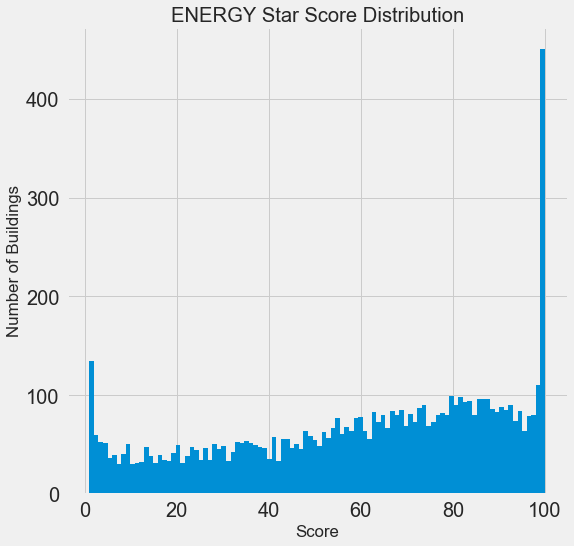

In [41]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(train_labels['score'].dropna(), bins = 100);
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('ENERGY Star Score Distribution');

# Evaluating & Computing Machine Learning Models

In this section we will build, train, and evalute several machine learning methods for our supervised regression task. The objective is to determine which model holds the most promise for further development (such as hyperparameter tuning).

We are comparing models using the mean absolute error. A baseline model that guessed the median value of the score was off by an average of 25 points

# Imputing Missing Values

Standard machine learning models cannot deal with missing values, and which means we have to find a way to fill these in or disard any features with missing values. Since we already removed features with more than 50% missing values in the first part, here we will focus on filling in these missing values, a process known as imputation). There are a number of methods for imputation but here we will use the relatively simple method of replacing missing values with the median of the column. (Here is a more thorough discussion on imputing missing values)

In the code below, we create a Scikit-learn Imputer object to fill in missing values with the median of the column. Notice that we train the imputer (using the Imputer.fit method) on the training data but not the testing data. We then transform (using Imputer.transform) both the training data and testing data. This means that the missing values in the testing set are filled in with the median value of the corresponding columns in the training set. We have to do it this way rather than because at deployment time, we will have to impute the missing values in new observations based on the previous training data. This is one way to avoid the problem known as data leakage where information from the testing set "leaks" into the training process.

In [42]:
# Create an imputer object with a median filling strategy
imputer = Imputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [43]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [44]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int32), array([], dtype=int32))
(array([], dtype=int32), array([], dtype=int32))


# Scaling Features

The final step to take before we can build our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm. Linear Regression and Random Forest do not require feature scaling, but other methods, such as support vector machines and k nearest neighbors, do require it because they take into account the Euclidean distance between observations. For this reason, it is a best practice to scale features when we are comparing multiple algorithms.

There are two ways to scale features:

For each value, subtract the mean of the feature and divide by the standard deviation of the feature. This is known as standardization and results in each feature having a mean of 0 and a standard deviation of 1.


For each value, subtract the minimum value of the feature and divide by the maximum minus the minimum for the feature (the range). This assures that all the values for a feature are between 0 and 1 and is called scaling to a range or normalization.

In [45]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [46]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

# Models to Evaluate

We will compare five different machine learning models using the great Scikit-Learn library:

1.Linear Regression

2.Support Vector Machine Regression

3.Random Forest Regression

4.Gradient Boosting Regression

5.K-Nearest Neighbors Regression

In [47]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [48]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 13.4651


In [49]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 10.9337


In [50]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 10.0147


In [51]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 10.0132


In [52]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 13.0131


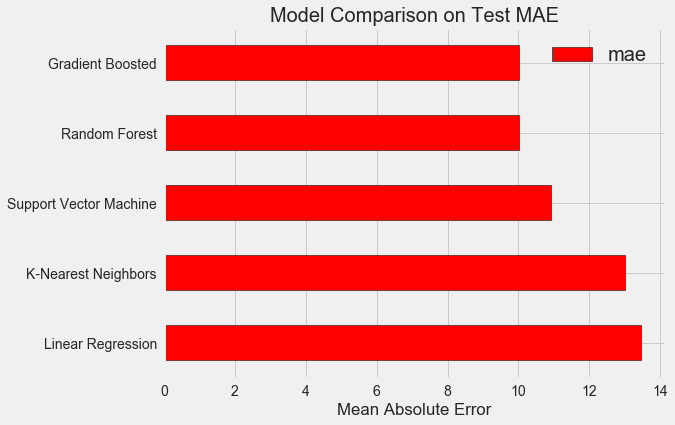

In [53]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

Depending on the run (the exact results change slighty each time), the gradient boosting regressor performs the best followed by the random forest. I have to admit that this is not the most fair comparison because we are using mostly the default hyperparameters. Especially with the Support Vector Regressor, the hyperparameters have a significant influence on performance. (the random forest and gradient boosting methods are great for starting out because the performance is less dependent on the model settings). Nonetheless, from these results, we can conclude that machine learning is applicable because all the models significantly outperform the baseline!

From here, I am going to concentrate on optimizing the best model using hyperparamter tuning. Given the results here, I will concentrate on using the GradientBoostingRegressor.

# Model Optimization

In machine learning, optimizing a model means finding the best set of hyperparameters for a particular problem.

# Hyperparameters

First off, we need to understand what model hyperparameters are in contrast to model parameters :

Model hyperparameters are best thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or the number of neighbors used in K Nearest Neighbors Regression.


Model parameters are what the model learns during training, such as the weights in the linear regression.

Tuning the model hyperparameters controls the balance of under vs over fitting in a model. We can try to correct for under-fitting by making a more complex model, such as using more trees in a random forest or more layers in a deep neural network. A model that underfits has high bias, and occurs when our model does not have enough capacity (degrees of freedom) to learn the relationship between the features and the target. We can try to correct for overfitting by limiting the complexity of the model and applying regularization. This might mean decreasing the degree of a polynomial regression, or adding dropout layers to a deep neural network. A model that overfits has high variance and in effect has memorized the training set. Both underfitting and overfitting lead to poor generalization performance on the test set.

# Hyperparameters with random search & cross validation

We can choose the best hyperparameters for a model through random search and cross validation.

Random search refers to the method in which we choose hyperparameters to evaluate: we define a range of options, and then randomly select combinations to try. This is in contrast to grid search which evaluates every single combination we specify. Generally, random search is better when we have limited knowledge of the best model hyperparameters and we can use random search to narrow down the options and then use grid search with a more limited range of options.



Cross validation is the method used to assess the performance of the hyperparameters. Rather than splitting the training set up into separate training and validation sets which reduces the amount of training data we can use, we use K-Fold Cross Validation. This means dividing the training data into K folds, and then going through an iterative process where we first train on K-1 of the folds and then evaluate performance on the kth fold. We repeat this process K times so eventually we will have tested on every example in the training data with the key that each iteration we are testing on data that we did not train on. At the end of K-fold cross validation, we take the average error on each of the K iterations as the final performance measure and then train the model on all the training data at once. The performance we record is then used to compare different combinations of hyperparameters.

Here we will implement random search with cross validation to select the optimal hyperparameters for the gradient boosting regressor. We first define a grid then peform an iterative process of: randomly sample a set of hyperparameters from the grid, evaluate the hyperparameters using 4-fold cross-validation, and then select the hyperparameters with the best performance.

Of course we don't actually do this iteration ourselves, we let Scikit-Learn and RandomizedSearchCV do the process for us!

In [54]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

We selected 6 different hyperparameters to tune in the gradient boosting regressor. These all will affect the model in different ways that are hard to determine ahead of time, and the only method for finding the best combination for a specific problem is to test them out! To read about the hyperparameters, I suggest taking a look at the Scikit-Learn documentation. For now, just know that we are trying to find the best combination of hyperparameters and because there is no theory to tell us which will work best, we just have to evaluate them, like runnning an experiment!

In the code below, we create the Randomized Search Object passing in the following parameters:

estimator: the model

param_distributions: the distribution of parameters we defined

cv the number of folds to use for k-fold cross validation

n_iter: the number of different combinations to try

scoring: which metric to use when evaluating candidates

n_jobs: number of cores to run in parallel (-1 will use all available)

verbose: how much information to display (1 displays a limited amount)

return_train_score: return the training score for each cross-validation fold

random_state: fixes the random number generator used so we get the same results every run
The Randomized Search Object is trained the same way as any other scikit-learn model. After training, we can compare all the different hyperparameter combinations and find the best performing one.

In [55]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [56]:
# Fit on the training data
random_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 33.8min finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

Scikit-learn uses the negative mean absolute error for evaluation because it wants a metric to maximize. Therefore, a better score will be closer to 0. We can get the results of the randomized search into a dataframe, and sort the values by performance.

In [57]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
12      50.789161      2.334607         0.089505        0.005679   
3       23.420330      0.920482         0.031501        0.004496   
9       26.383191      0.383591         0.056151        0.006623   
0        5.503210      0.588966         0.006875        0.001083   
7       19.611622      1.554958         0.047753        0.002165   
10     267.075858     16.360855         0.343205        0.002115   
19      80.767342      1.590812         0.169505        0.016745   
2       69.478104      2.258858         0.066254        0.003419   
16      89.216754      1.706713         0.201651        0.019210   
21      21.056487      0.216897         0.120900        0.006755   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
12                500                       6                      6   
3                 500                       6                      8   
9                 500                       4                      2   
0                 100                       2                      6   
7                 500                       4                      6   
10               1100                      10                      6   
19               1100                       6                      2   
2                 500                       4                      2   
16               1500                       4                      6   
21                500                       6                      4   

   param_max_features param_max_depth param_loss  \
12               None               5        lad   
3                None               5      huber   
9                auto               3      huber   
0                auto               5         ls   
7                auto               3         ls   
10               None              10      huber   
19               auto               3        lad   
2                auto              10      huber   
16               None               3         ls   
21               log2               5      huber   

                                               params  split0_test_score  \
12  {'n_estimators': 500, 'min_samples_split': 6, ...          -8.859381   
3   {'n_estimators': 500, 'min_samples_split': 6, ...          -8.868788   
9   {'n_estimators': 500, 'min_samples_split': 4, ...          -9.134318   
0   {'n_estimators': 100, 'min_samples_split': 2, ...          -9.101610   
7   {'n_estimators': 500, 'min_samples_split': 4, ...          -9.146159   
10  {'n_estimators': 1100, 'min_samples_split': 10...          -9.261256   
19  {'n_estimators': 1100, 'min_samples_split': 6,...          -9.379335   
2   {'n_estimators': 500, 'min_samples_split': 4, ...          -9.385744   
16  {'n_estimators': 1500, 'min_samples_split': 4,...          -9.246573   
21  {'n_estimators': 500, 'min_samples_split': 6, ...          -9.393840   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
12          -8.773966          -9.325139          -9.036779        -8.998761   
3           -8.904791          -9.315304          -9.075321        -9.041004   
9           -9.042461          -9.441179          -9.152240        -9.192518   
0           -9.026912          -9.456259          -9.201033        -9.196413   
7           -9.199358          -9.699696          -9.357220        -9.350555   
10          -9.243867          -9.528538          -9.473096        -9.376652   
19          -9.382576          -9.473980          -9.290880        -9.381693   
2           -9.288317          -9.572674          -9.429825        -9.419115   
16          -9.317156          -9.798950          -9.424668        -9.446787   
21          -9.289175          -9.750806          -9.407503        -9.460295   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
12        0.210901                1           -7.027368           -6.837958   
3         0.1

In [58]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

The best gradient boosted model has the following hyperparameters:

loss = lad

n_estimators = 500

max_depth = 5

min_samples_leaf = 6

min_samples_split = 6

max_features = None (This means that max_features = n_features according to the docs)

Using random search is a good method to narrow down the possible hyperparameters to try. Initially, we had no idea which combination would work the best, but this at least narrows down the range of options.


We could use the random search results to inform a grid search by creating a grid with hyperparameters close to those that worked best during the randomized search. However, rather than evaluating all of these settings again, I will focus on a single one, the number of trees in the forest (n_estimators). By varying only one hyperparameter, we can directly observe how it affects performance. In the case of the number of trees, we would expect to see a significant affect on the amount of under vs overfitting.


Here we will use grid search with a grid that only has the n_estimators hyperparameter. We will evaluate a range of trees then plot the training and testing performance to get an idea of what increasing the number of trees does for our model. We will fix the other hyperparameters at the best values returned from random search to isolate the number of trees effect.

In [59]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [60]:
# Fit the grid search
grid_search.fit(X, y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.9min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

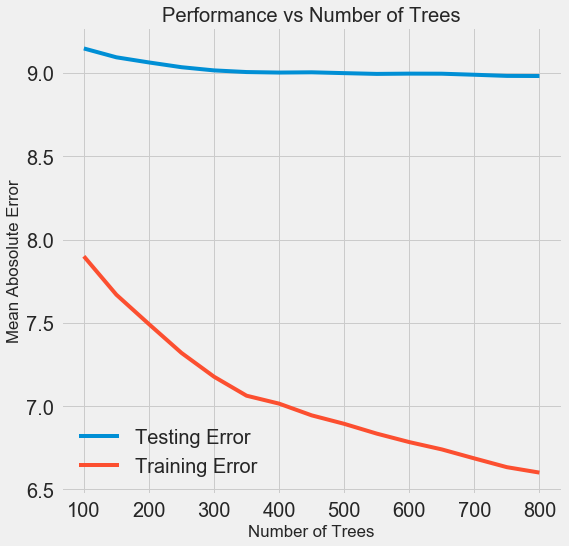

In [61]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [62]:
results.sort_values('mean_test_score', ascending = False).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
14      42.924746      3.441820         0.064851        0.015923   
13      43.607416      1.496894         0.070200        0.007800   
12      45.479335      1.702533         0.062301        0.000172   
9       57.510353      1.491617         0.098750        0.008920   
11      49.302054      6.331661         0.152259        0.110461   

   param_n_estimators                 params  split0_test_score  \
14                800  {'n_estimators': 800}          -8.825018   
13                750  {'n_estimators': 750}          -8.830294   
12                700  {'n_estimators': 700}          -8.835777   
9                 550  {'n_estimators': 550}          -8.853451   
11                650  {'n_estimators': 650}          -8.850857   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
14          -8.757257          -9.297520          -9.046451        -8.981504   
13          -8.750657          -9.299357          -9.048696        -8.982193   
12          -8.754819          -9.313318          -9.052721        -8.989100   
9           -8.755897          -9.325442          -9.041991        -8.994138   
11          -8.754361          -9.325111          -9.051181        -8.995319   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
14        0.211453                1           -6.739448           -6.648109   
13        0.213125                2           -6.772908           -6.660453   
12        0.216536                3           -6.812928           -6.695770   
9         0.217136                4           -7.003413           -6.781878   
11        0.218405                5           -6.864375           -6.721452   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
14           -6.486269           -6.530287         -6.601028         0.099437  
13           -6.520818           -6.579989         -6.633542         0.094501  
12           -6.611240           -6.624919         -6.686214         0.079884  
9            -6.809121           -6.745712         -6.835031         0.099783  
11           -6.708191           -6.666758         -6.740194         0.074480

From this plot, it's pretty clear that our model is overfitting! The training error is significantly lower than the testing error, which shows that the model is learning the training data very well but then is not able to generalize to the test data as well. Moveover, as the number of trees increases, the amount of overfitting increases. Both the test and training error decrease as the number of trees increase but the training error decreases more rapidly.



There will always be a difference between the training error and testing error (the training error is always lower) but if there is a significant difference, we want to try and reduce overfitting, either by getting more training data or reducing the complexity of the model through hyperparameter tuning or regularization. For the gradient boosting regressor, some options include reducing the number of trees, reducing the max depth of each tree, and increasing the minimum number of samples in a leaf node.

Based on the cross validation results, the best model using 800 trees and achieves a cross validation error under 9. This indicates that the average cross-validation estimate of the Energy Star Score is within 9 points of the true answer!

# Evaluate Final model on the test set

We will use the best model from hyperparameter tuning to make predictions on the testing set. Remember, our model has never seen the test set before, so this performance should be a good indicator of how the model would perform if deployed in the real world.

For comparison, we can also look at the performance of the default model. The code below creates the final model, trains it (with timing), and evaluates on the test set.

In [64]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=800, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [65]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

3.42 s ± 581 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [66]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

53.6 s ± 2.57 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [67]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 10.0118.
Final model performance on the test set:   MAE = 9.0446.


The final model does out-perform the baseline model by about 10%, but at the cost of significantly increased running time (it's about 12 times slower on my machine). Machine learning is often a field of tradeoffs: bias vs variance, acccuracy vs interpretability, accuracy vs running time, and the final decision of which model to use depends on the situation. Here, the increase in run time is not an impediment, because while the relative difference is large, the absolute magnitude of the training time is not significant. In a different situation, the balance might not be the same so we would need to consider what we are optimizing for and the limitations we have to work with.

To get a sense of the predictions, we can plot the distribution of true values on the test set and the predicted values on the test set.

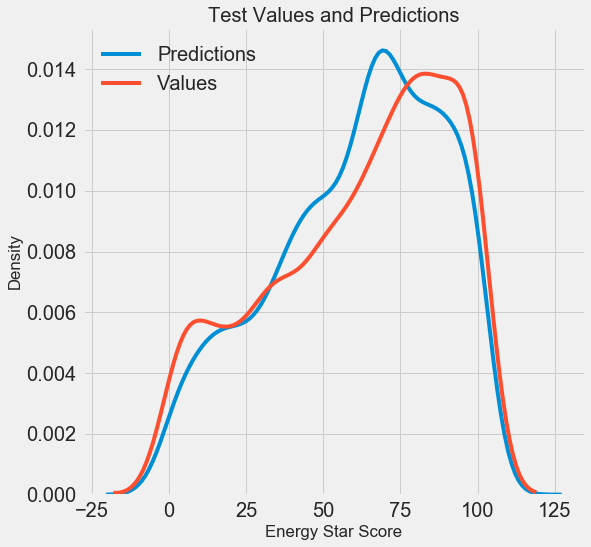

In [68]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

The distribution looks to be nearly the same although the density of the predicted values is closer to the median of the test values rather than to the actual peak at 100. It appears the model might be less accurate at predicting the extreme values and instead predicts values closer to the median.

Another diagnostic plot is a histogram of the residuals. Ideally, we would hope that the residuals are normally distributed, meaning that the model is wrong the same amount in both directions (high and low).

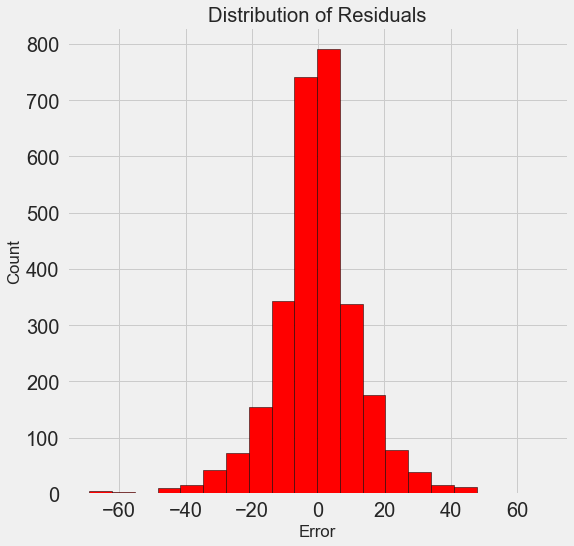

In [69]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');



The residuals are close to normally disributed, with a few noticeable outliers on the low end. These indicate errors where the model estimate was far below that of the true value.

# Conclusion


Conclusions
In this notebook, we covered crucial concepts in the machine learning pipeline:

Imputing missing values

Evaluating and comparing several machine learning methods

Hyperparameter tuning a machine learning model using random search and cross validation

Evaluating the best model on the testing set

The results showed us that machine learning is applicable to our problem, with the final model able to the predict the Energy Star Score of a building to within 9.1 points. We also saw that hyperparamter tuning was able to improve the performance of the model although at a considerable cost in terms of time invested. This is a good reminder that proper feature engineering and gathering more data (if possible!) has a much larger pay-off than fine-tuning the model. We also observed the trade-off in run-time versus accuracy, which is one of many considerations we have to take into account when designing machine learning models.

We know our model is accurate, but do we know why it makes the predictions it does? The next step in the machine learning process is crucial: trying to understand how the model makes predictions. Achieveing high accuracy is great, but it would also be helpful if we could figure out why the model is able to predict accurately so we could use this information to better understand the problem. For example, what features does the model rely on to infer the Energy Star Score? It is possible to use this model for feature selection and implement a simpler model that is more interpretable?

# Imports

In [89]:
# Imputing missing values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import tree

# LIME for explaining predictions
import lime 
import lime.lime_tabular



In [74]:
# Read in data into dataframes 
train_features = pd.read_csv('training_features.csv')
test_features = pd.read_csv('testing_features.csv')
train_labels = pd.read_csv('training_labels.csv')
test_labels = pd.read_csv('testing_labels.csv')

# Recreate Final Model

In [75]:
# Create an imputer object with a median filling strategy
imputer = Imputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

# Sklearn wants the labels as one-dimensional vectors
y = np.array(train_labels).reshape((-1,))
y_test = np.array(test_labels).reshape((-1,))

In [76]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [77]:
model = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

model.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=800, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [78]:
#  Make predictions on the test set
model_pred = model.predict(X_test)

print('Final Model Performance on the test set: MAE = %0.4f' % mae(y_test, model_pred))

Final Model Performance on the test set: MAE = 9.0837


# Interpret the Model

Machine learning is often criticized as being a black-box: we put data in on one side and it gives us the answers on the other. While these answers are often extremely accurate, the model tells us nothing about how it actually made the predictions. This is true to some extent, but there are ways in which we can try and discover how a model "thinks" such as the Locally Interpretable Model-agnostic Explainer (LIME). This attemps to explain model predictions by learning a linear regression around the prediction, which is an easily interpretable model!

We will explore several ways to interpret our model:

Feature importances

Locally Interpretable Model-agnostic Explainer (LIME)

Examining a single decision tree in the ensemble.

# Feature Importance

One of the basic ways we can interpret an ensemble of decision trees is through what are known as the feature importances. These can be interpreted as the variables which are most predictive of the target.

Extracting the feature importances from a trained ensemble of trees is quite easy in scikit-learn. We will store the feature importances in a dataframe to analyze and visualize them.

In [79]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(train_features.columns), 
                                'importance': model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

feature  importance
0                                Site EUI (kBtu/ft²)    0.403532
1  Weather Normalized Site Electricity Intensity ...    0.263059
2      Water Intensity (All Water Sources) (gal/ft²)    0.071286
3                                        Property Id    0.035165
4  Largest Property Use Type_Non-Refrigerated War...    0.031924
5                               DOF Gross Floor Area    0.027900
6  log_Water Intensity (All Water Sources) (gal/ft²)    0.026058
7                                              Order    0.024592
8        log_Direct GHG Emissions (Metric Tons CO2e)    0.023655
9                                         Year Built    0.022100

The Site Energy Use Intensity, Site EUI (kBtu/ft²), and the Weather Normalized Site Electricity Intensity, Weather Normalized Site Electricity Intensity (kWh/ft²) are the two most important features by quite a large margin. After that, the relative importance drops off considerably which indicates that we might not need to retain all of the features to create a model with nearly the same performance.

Let's graph the feature importances to compare visually.

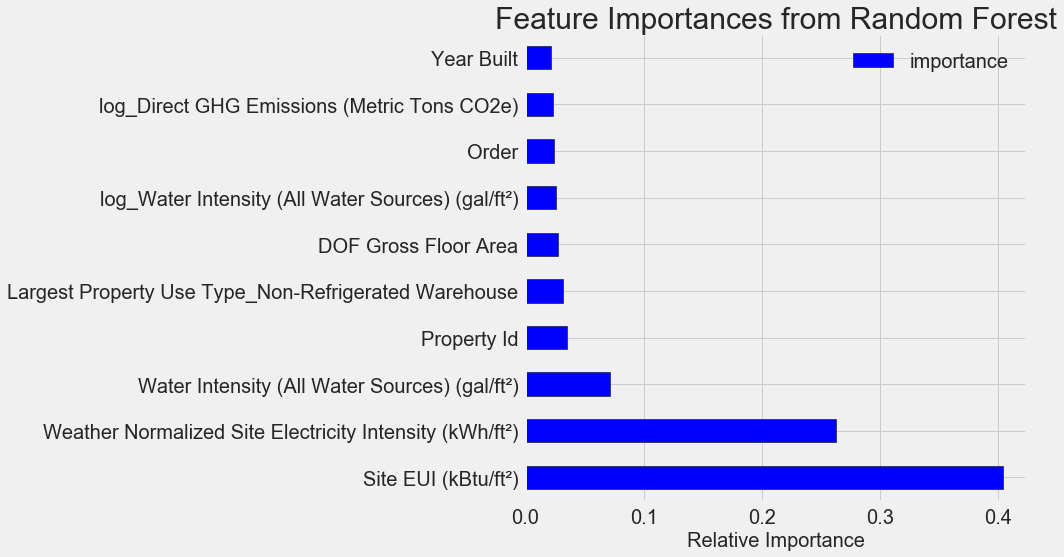

In [83]:
figsize=(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

# Use feature importance for feature selection.

Given that not every feature is important for finding the score, what would happen if we used a simpler model, such as a linear regression, with the subset of most important features from the random forest? The linear regression did outperform the baseline, but it did not perform well compared to the model complex models. Let's try using only the 10 most important features in the linear regression to see if performance is improved. We can also limit to these features and re-evaluate the random forest.

In [84]:
# Extract the names of the most important features
most_important_features = feature_results['feature'][:10]

# Find the index that corresponds to each feature name
indices = [list(train_features.columns).index(x) for x in most_important_features]

# Keep only the most important features
X_reduced = X[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (6622, 10)
Most important testing  features shape:  (2839, 10)


In [85]:
lr = LinearRegression()

# Fit on full set of features
lr.fit(X, y)
lr_full_pred = lr.predict(X_test)

# Fit on reduced set of features
lr.fit(X_reduced, y)
lr_reduced_pred = lr.predict(X_test_reduced)

# Display results
print('Linear Regression Full Results: MAE =    %0.4f.' % mae(y_test, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mae(y_test, lr_reduced_pred))

Linear Regression Full Results: MAE =    13.4651.
Linear Regression Reduced Results: MAE = 15.1007.


Well, reducing the features did not improve the linear regression results! It turns out that the extra information in the features with low importance do actually improve performance.

Let's look at using the reduced set of features in the gradient boosted regressor. How is the performance affected?

In [86]:
# Create the model with the same hyperparamters
model_reduced = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

# Fit and test on the reduced set of features
model_reduced.fit(X_reduced, y)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))

Gradient Boosted Reduced Results: MAE = 10.8594


The model results are slightly worse with the reduced set of features and we will keep all of the features for the final model. The desire to reduce the number of features is because we are always looking to build the most parsimonious model: that is, the simplest model with adequate performance. A model that uses fewer features will be faster to train and generally easier to interpret. In this case, keeping all of the features is not a major concern because the training time is not significant and we can still make interpretations with many features.

# Logically interpretable Model - agnostic Explanations

We will look at using LIME to explain individual predictions made the by the model. LIME is a relatively new effort aimed at showing how a machine learning model thinks by approximating the region around a prediction with a linear model.

We will look at trying to explain the predictions on an example the model gets very wrong and an example the model gets correct. We will restrict ourselves to using the reduced set of 10 features to aid interpretability. The model trained on the 10 most important features is slightly less accurate, but we generally have to trade off accuracy for interpretability!

In [90]:
# Find the residuals
residuals = abs(model_reduced_pred - y_test)
    
# Exact the worst and best prediction
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [91]:
# Create a lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_reduced, 
                                                   mode = 'regression',
                                                   training_labels = y,
                                                   feature_names = list(most_important_features))

Prediction: 12.8615
Actual Value: 100.0000


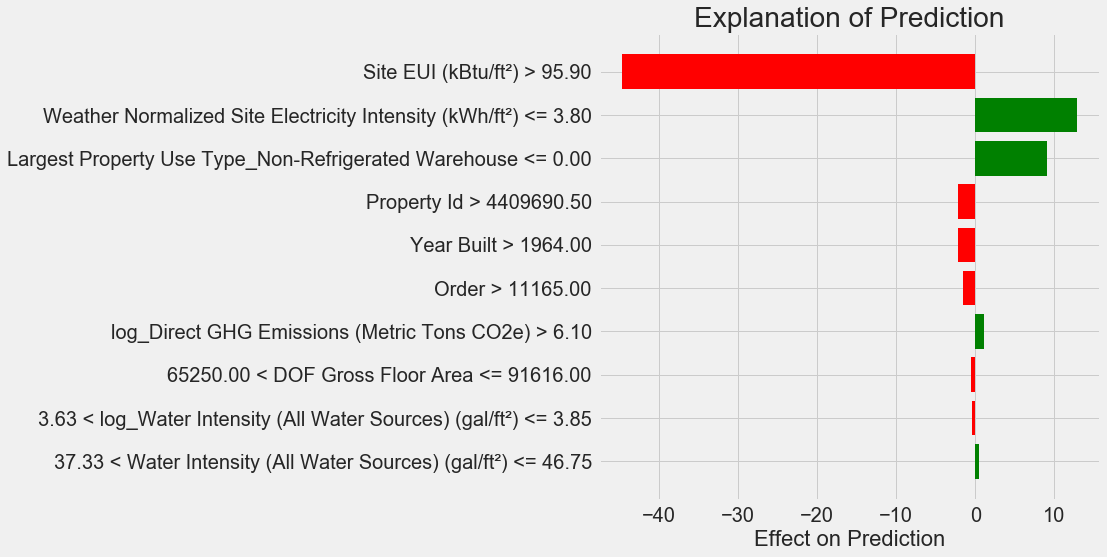

In [92]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model_reduced.predict)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [93]:
wrong_exp.show_in_notebook(show_predicted_value=False)

In this example, our gradient boosted model predicted a score of 12.86 and the actual value was 100.

The plot from LIME is showing us the contribution to the final prediction from each of the features for the example. We can see that the Site EUI singificantly decreased the prediction because it was above 95.50. The Weather Normalized Site Electricity Intensity on the other hand, increased the prediction because it was lower than 3.80.

We can interpret this as saying that our model thought the Energy Star Score would be much lower than it actually was because the Site EUI was high. However, in this case, the score was 100 despite the high value of the EUI. While this significant mistake (off by 88 points!) might initially have been confusing, now we can see that in reality, the model was reasoning through the problem and just arrived at the incorrect value! A human going over the same process probably would have arrived at the same conclusion (if they had the patience to go through all the data).

Now we can go through the same process with a prediction the model got correct.

Prediction: 100.0000
Actual Value: 100.0000


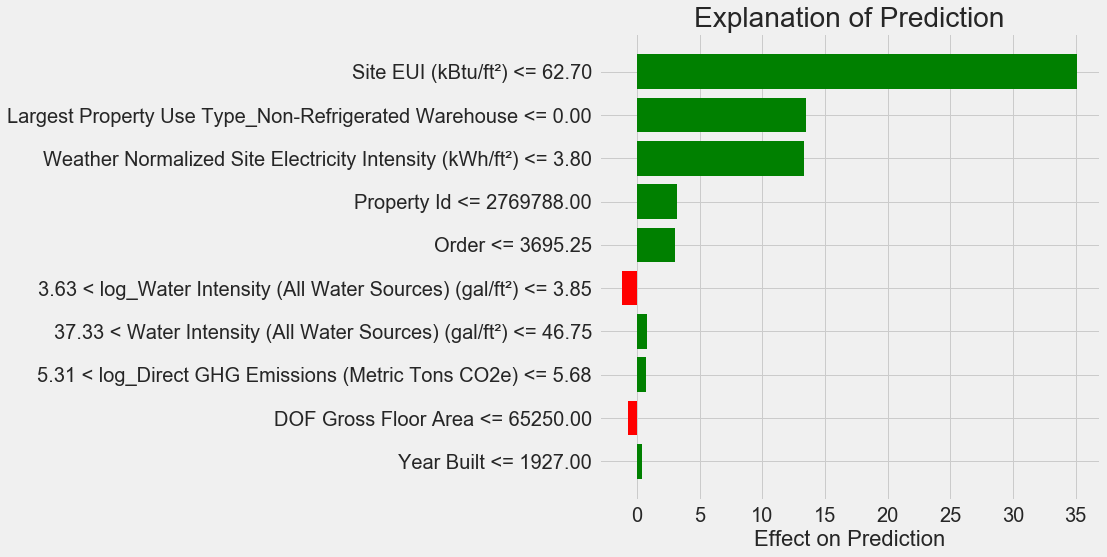

In [94]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, model_reduced.predict, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [95]:
right_exp.show_in_notebook(show_predicted_value=False)

The correct value for this case was 100 which our gradient boosted model got right on!

The plot from LIME again shows the contribution to the prediciton of each of feature variables for the example. For instance, because the Site EUI was less than 62.70, that contributed significantly to a higher estimate of the score. Likewise, the year built being less than 1927 also positively contributed to the final prediction.

Observing break down plots like these allow us to get an idea of how the model makes a prediction. This is probably most valuable for cases where the model is off by a large amount as we can inspect the errors and perhaps engineer better features or adjust the hyperparameters of the model to improve predictions for next time. The examples where the model is off the most could also be interesting edge cases to look at manually. The model drastically underestimated the Energy Star Score for the first building because of the elevated Site EUI. We might therefore want to ask why the building has such a high Energy Star Score even though it has such a high EUI. A process such as this where we try to work with the machine learning algorithm to gain understanding of a problem seems much better than simply letting the model make predictions and completely trusting them! Although LIME is not perfect, it represents a step in the right direction towards explaining machine learning models.

# Examing a single decision tree

One of the coolest parts about a tree-based ensemble is that we can look at any individual estimator. Although our final model is composed of 800 decision trees, and looking at a single one is not indicative of the entire model, it still allows us to see the general idea of how a decision tree works. From there, it is a natural extension to imagine hundreds of these trees building off the mistakes of previous trees to make a final prediction (this is a significant oversimplification of how gradient boosting regression works!)

We will first extract a tree from the forest and then save it using sklearn.tree.export_graphviz. This saves the tree as a .dot file which can be converted to a png using command line instructions in the Notebook.

In [98]:
# Extract a single tree
single_tree = model_reduced.estimators_[105][0]

tree.export_graphviz(single_tree, out_file = 'tree.dot',
                     rounded = True, 
                     feature_names = most_important_features,
                     filled = True)

single_tree

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=6,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x08C4F300>,
           splitter='best')

In [102]:
# Convert to a png from the command line
# This requires the graphviz visualization library (https://www.graphviz.org/)


# !dot -Tpng images/tree.dot -o images/tree.png

In [101]:
tree.export_graphviz(single_tree, out_file = 'tree_small.dot',
                     rounded = True, feature_names = most_important_features,
                     filled = True, max_depth = 3)

Now we can take a look at the tree and try to intrepret it's decisions! The best way to think of a decision tree is as a series of yes/no questions, like a flowchart. We start at the top, called the root, and move our way down the tree, with the direction of travel determined by the answer to each equation.

For instance, here the first question we ask is: is the Site EUI less than or equal to 15.95? If the answer is yes, then we move to the left and ask the question: is the Weather Normalized Site Electricity Intensity less than or equal to 3.85? If the answer to the first question was no, we move to the right and ask the question is the Weather Normalized Site Electricity Intensity less than or equal to 26.85?

We continue this iterative process until we reach the bottom of the tree and end up in a leaf node. Here, the value we predict corresponds to the value shown in the node (the values in this tree appear to be the actual predictions divided by 100).

Each node has four different pieces of information:

The question: based on this answer we move right or left to the next node a layer down in the tree

The friedman_mse: a measure of the error for all of the examples in a given node

The samples: number of examples in a node

The value: the prediction of the target for all examples in a node

We can see that as we increase the depth of the tree, we will be better able to fit the data. With a small tree, there will be many examples in each leaf node, and because the model estimates the same value for each example in a node, there will probably be a larger error (unless all of the examples have the same target value). Constructing too large of a tree though can lead to overfitting. We can control a number of hyperparameters that determine the depth of the tree and the number of examples in each leaf. We saw how to select a few of these hyperaparameters in the second part when we performed optimimation using cross validation.

Although we clearly cannot examine every tree in our model, looking at a single one does give us some idea how our model makes predictions. In fact, this flowchart based method seems much like how a human makes decisions, answering one question about a single value at a time. Decision tree based ensembles simply take the idea of a single decision tree and combine the predictions of many individuals in order to create a model with less variance than a single estimator. Ensembles of trees tend to be very accurate, and also are intuitive to explain!